# 03. Classification. Homework

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
data_url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv"
df = pd.read_csv(data_url)

In [3]:
df

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
...,...,...,...,...,...,...,...,...,...
1457,referral,manufacturing,1,NaN,self_employed,north_america,4,0.53,1
1458,referral,technology,3,65259.0,student,europe,2,0.24,1
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02,1
1460,referral,NaN,5,71016.0,self_employed,north_america,0,0.25,1


## Data preparation

* Check if the missing values are presented in the features.
* If there are missing values:
    * For caterogiral features, replace them with 'NA'
    * For numerical features, replace with with 0.0 

In [4]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [5]:
# Check if the missing values are presented in the features.
df.isna().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [6]:
categorical_features = df.columns[df.dtypes == 'object']
numerical_features = df.columns[df.dtypes != 'object']

In [7]:
categorical_features

Index(['lead_source', 'industry', 'employment_status', 'location'], dtype='object')

In [8]:
numerical_features = numerical_features.delete(-1)
numerical_features

Index(['number_of_courses_viewed', 'annual_income', 'interaction_count',
       'lead_score'],
      dtype='object')

In [9]:
df[categorical_features] = df[categorical_features].fillna('NA')
df[numerical_features] = df[numerical_features].fillna(0.0)


In [10]:
df

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NA,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NA,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
...,...,...,...,...,...,...,...,...,...
1457,referral,manufacturing,1,0.0,self_employed,north_america,4,0.53,1
1458,referral,technology,3,65259.0,student,europe,2,0.24,1
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02,1
1460,referral,NA,5,71016.0,self_employed,north_america,0,0.25,1


## Question 1

What is the most frequent observation (mode) for the column `industry`?

- `NA`
- `technology`
- `healthcare`
- `retail` [x]


In [11]:
df['industry'].mode()

0    retail
Name: industry, dtype: object

## Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 
In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

- `interaction_count` and `lead_score`
- `number_of_courses_viewed` and `lead_score`
- `number_of_courses_viewed` and `interaction_count`
- `annual_income` and `interaction_count` [x]

Only consider the pairs above when answering this question.

<Axes: >

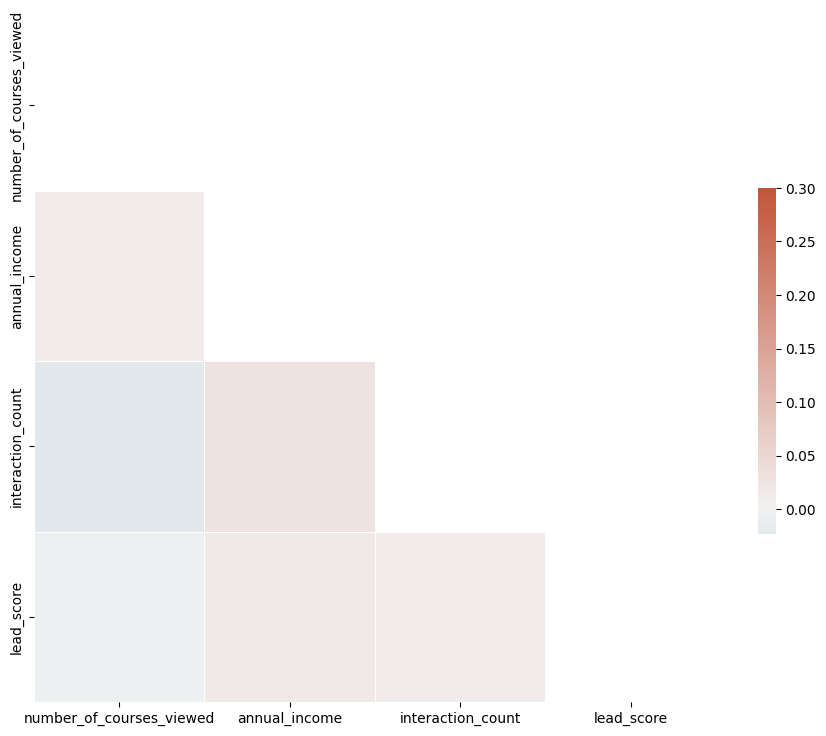

In [12]:
corr = df[numerical_features].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11,9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [13]:
corr

,number_of_courses_viewed,annual_income,interaction_count,lead_score
number_of_courses_viewed,1.000000,0.009770,-0.023565,-0.004879
annual_income,0.009770,1.000000,0.027036,0.015610
interaction_count,-0.023565,0.027036,1.000000,0.009888
lead_score,-0.004879,0.015610,0.009888,1.000000


## Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value `y` is not in your dataframe.

In [14]:
X_train, X_val_test, y_train, y_val_test = train_test_split(df.drop(columns=['converted']), df['converted'], random_state=42, test_size=0.4)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, random_state=42, test_size=0.5)

In [15]:
for df in [X_train, X_val, X_test, y_train, y_val, y_test]:
    df = df.reset_index(drop=True)

## Question 3

* Calculate the mutual information score between `y` and other categorical variables in the dataset. Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the biggest mutual information score?
  
- `industry`
- `location`
- `lead_source` [x]
- `employment_status`

In [16]:
categorical_columns = list(X_train.dtypes[X_train.dtypes == 'object'].index)
categorical_columns

['lead_source', 'industry', 'employment_status', 'location']

In [17]:
from sklearn.metrics import mutual_info_score
def mutual_info_converted(series):
    return mutual_info_score(series, y_train)

mi = X_train[categorical_columns].apply(mutual_info_converted)
mi.sort_values(ascending=False)

lead_source          0.028192
employment_status    0.018339
industry             0.015059
location             0.003457
dtype: float64

## Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.64
- 0.74 [x]
- 0.84
- 0.94

In [18]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

In [19]:
train_dicts = X_train.to_dict(orient='records')
val_dicts = X_val.to_dict(orient='records')

In [20]:
X_dv_train = dv.fit_transform(train_dicts)
X_dv_val = dv.transform(val_dicts)

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_dv_train, y_train)
y_pred_proba = model.predict_proba(X_dv_val)[:, 1]

In [22]:
converted_decisions = (y_pred_proba >= 0.5)
(y_val == converted_decisions).mean().round(2)

np.float64(0.74)

## Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model using the same features and parameters as in Q4 (without rounding).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 

Which of following feature has the smallest difference?

- `'industry'`
- `'employment_status'` [x]
- `'lead_score'`

> **Note**: The difference doesn't have to be positive.

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_dv_train, y_train)
y_pred_proba = model.predict_proba(X_dv_val)[:, 1]
converted_decisions = (y_pred_proba >= 0.5)
base_accuracy = (y_val == converted_decisions).mean()
base_accuracy

np.float64(0.7431506849315068)

In [31]:
col_accuracies = {}
for column in X_train.columns:
    features = list(X_train.columns)
    features.remove(column)

    train_dicts_col = X_train[features].to_dict(orient='records')
    val_dicts_col = X_val[features].to_dict(orient='records')

    X_dv_train_col = dv.fit_transform(train_dicts_col)
    X_dv_val_col = dv.transform(val_dicts_col)
    
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_dv_train_col, y_train)
    y_pred_proba_col = model.predict_proba(X_dv_val_col)[:, 1]
    converted_decisions_col = (y_pred_proba_col >= 0.5)
    accurcacy_col = (y_val == converted_decisions_col).mean()
    col_accuracies[column] = accurcacy_col
    print(f"Accuracy without column '{column}' is {accurcacy_col}. Difference with base: {base_accuracy - accurcacy_col}")


Accuracy without column 'lead_source' is 0.7294520547945206. Difference with base: 0.013698630136986245
Accuracy without column 'industry' is 0.7431506849315068. Difference with base: 0.0
Accuracy without column 'number_of_courses_viewed' is 0.678082191780822. Difference with base: 0.06506849315068486
Accuracy without column 'annual_income' is 0.8561643835616438. Difference with base: -0.113013698630137
Accuracy without column 'employment_status' is 0.7465753424657534. Difference with base: -0.003424657534246589
Accuracy without column 'location' is 0.7431506849315068. Difference with base: 0.0
Accuracy without column 'interaction_count' is 0.6746575342465754. Difference with base: 0.06849315068493145
Accuracy without column 'lead_score' is 0.7431506849315068. Difference with base: 0.0


## Question 6

* Now let's train a regularized logistic regression.
* Let's try the following values of the parameter `C`: `[0.01, 0.1, 1, 10, 100]`.
* Train models using all the features as in Q4.
* Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these `C` leads to the best accuracy on the validation set?

- 0.01 [x]
- 0.1
- 1
- 10
- 100

> **Note**: If there are multiple options, select the smallest `C`.

In [36]:
param_scores = {}
for cscore in [0.01, 0.1, 1, 10, 100]:
    train_dicts_c = X_train.to_dict(orient='records')
    val_dicts_c = X_val.to_dict(orient='records')

    X_dv_train_c = dv.fit_transform(train_dicts_c)
    X_dv_val_c = dv.transform(val_dicts_c)
    model_c = LogisticRegression(C=cscore, random_state=42)
    model_c.fit(X_dv_train_c, y_train)
    y_pred_proba_c = model_c.predict_proba(X_dv_val_c)[:, 1]
    converted_decisions_c = (y_pred_proba_c >= 0.5)
    accurcacy_col_c = (y_val == converted_decisions_c).mean()
    param_scores[cscore] = accurcacy_col_c

param_scores

/Users/vadim.sokoltsov/learning/datatalks.club/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vadim.sokoltsov/learning/datatalks.club/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:

{0.01: np.float64(0.8493150684931506),
 0.1: np.float64(0.8321917808219178),
 1: np.float64(0.839041095890411),
 10: np.float64(0.8458904109589042),
 100: np.float64(0.839041095890411)}